## Honda

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

In [3]:
sys.path.append('C:\\Users\\Bruger\\AppStat2021\\External_Functions')
import Clotilde_external_functions as cef
import ExternalFunctions as ef

In [4]:
r_theta = r'$\theta$'
r_numu = r'$\nu_{\mu}$'

In [5]:
# cos intervals
cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
cos_strings = []

for i in range(len(cos_values)-1):
    string = f'{cos_values[i+1]} - {cos_values[i]}'
    cos_strings.append(string)

In [6]:
# Loading the data
len_file = 2060
len_subfile = 103
footer_skip_lines = len_file - np.arange(len_subfile, len_file+1, len_subfile)
header_skip_lines = np.arange(2, len_file-len_subfile+3, len_subfile)

# Same energy array for all angles
energy_sp = np.genfromtxt('2.6_sp_solmax.d', skip_header = header_skip_lines[0], 
                          skip_footer = footer_skip_lines[0])[:, 0]

# Matrix with all fluxes
numu_sp_matrix = np.zeros((len(footer_skip_lines), len_subfile-2))
numubar_sp_matrix = np.zeros((len(footer_skip_lines), len_subfile-2))

for i in range(len(footer_skip_lines)):
    numu_sp = np.genfromtxt('2.6_sp_solmax.d', skip_header = header_skip_lines[i], 
                            skip_footer = footer_skip_lines[i])[:, 1]
    numu_sp_matrix[i,:] = numu_sp
    numubar_sp = np.genfromtxt('2.6_sp_solmax.d', skip_header = header_skip_lines[i], 
                            skip_footer = footer_skip_lines[i])[:, 2]
    numubar_sp_matrix[i,:] = numubar_sp
    
total_numu = numu_sp_matrix + numubar_sp_matrix

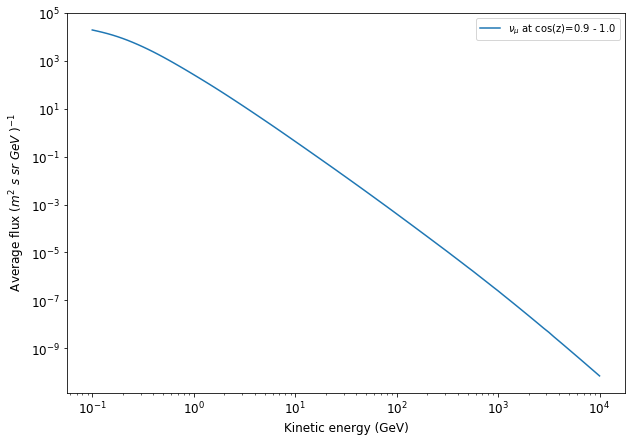

In [7]:
# Plot for cos(z) = 0.9 - 1.0

fig, ax = plt.subplots(figsize=(10,7))
r_phi = r'$\phi_{Az}$'
ax.loglog(energy_sp, total_numu[0,:], label=f'{r_numu} at cos(z)={cos_strings[0]}')

ax.set_xlabel('Kinetic energy (GeV)', fontsize=12)
ax.set_ylabel(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
#ax.set_xlim(1, 1.6)
#ax.set_ylim(10, 150)
ax.legend()

np.savetxt('Honda_energy',  energy_sp , delimiter=',')
np.savetxt('Honda_1dflux',  numu_sp_matrix[0,:] , delimiter=',')

In [8]:
def find_nearest_above(my_array, target):
    
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    
    if np.all(mask):
        return None 
    masked_diff = np.ma.masked_array(diff, mask)
    
    return masked_diff.argmin()

# Limit to range 1-100 GeV
low_x = find_nearest_above(energy_sp, 0.9)
high_x =  find_nearest_above(energy_sp, 100)
energy_cropped = energy_sp[low_x : high_x]
np.savetxt('energy_cropped', energy_cropped)
Honda_unbinned_cropped = total_numu[:, low_x:high_x]
Honda_flux0 = Honda_unbinned_cropped[0,:]
Honda_flux90 = Honda_unbinned_cropped[10,:]

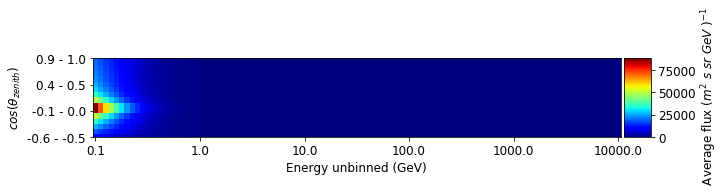

In [9]:
# UNBINNED

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(total_numu, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy unbinned (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels([energy_sp[0], energy_sp[20], energy_sp[40], energy_sp[60],
                    energy_sp[80], energy_sp[100]])
ax.set_yticks([0,5,10,15])
ax.set_yticklabels([cos_strings[0], cos_strings[5], cos_strings[10], cos_strings[15]]);
cbar.set_label(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$');

#fig.savefig('Honda_unbinned')

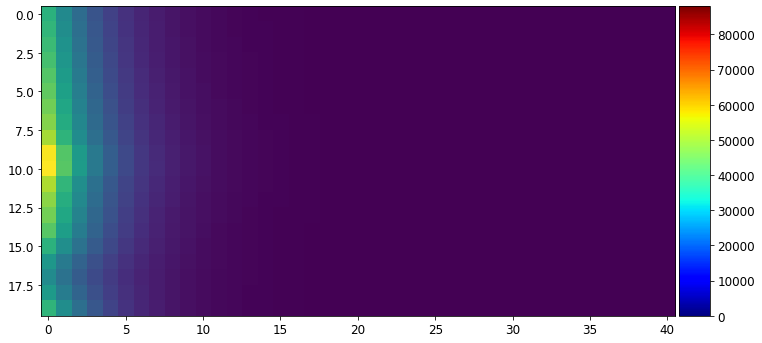

In [10]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(Honda_unbinned_cropped)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)

In [11]:
# Energy bins
energy_min = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins = np.digitize(energy_cropped, energy_min)
energy_binwidths = energy_max - energy_min

In [12]:
#Binning energies
Honda_binned_cropped = np.zeros((len(total_numu[:,0]), len(energy_min)))

# averaging columns in same interval
for i in range(1, len(energy_min)+1):
    columns = np.where(energy_bins == i)[0]
    averaged_column = np.mean(Honda_unbinned_cropped[ : , columns[0] : columns[-1]+1], axis = 1)
    Honda_binned_cropped[ : , i-1 ] = averaged_column

In [13]:
xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min, energy_max[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

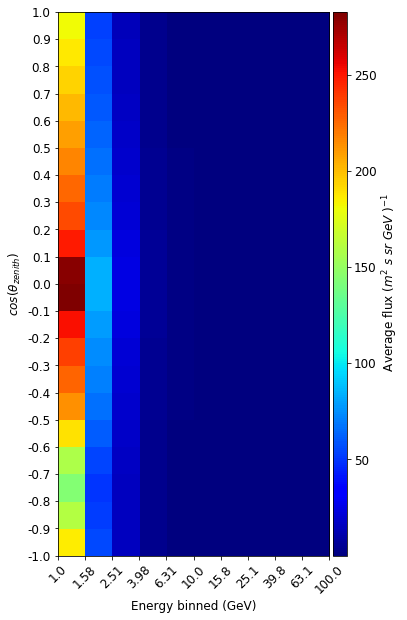

In [14]:
# BINNED PLOT

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(Honda_binned_cropped, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy binned (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
#fig.savefig('Honda_binned_flux');

In [15]:
def flux_plot(matrix, title=None, cbar_label = r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$ $GeV^{-1}$', savefig = None):
    
    matrix_plot = matrix.copy()
            
    fig, ax = plt.subplots(figsize=(14,10))

    im = ax.imshow(matrix, cmap='jet') 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cbar = plt.colorbar(im, cax=cax)
    ax.set_xlabel('Energy binned (GeV)', fontsize = 12)
    ax.set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
    ax.set_xticks(xticks)
    ax.set_xticklabels(energy_strings, rotation =45)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.set_title(title)
    cbar.set_label(cbar_label, fontsize = 12)
    
    if savefig != None:
        fig.savefig(savefig)
    
    return matrix

In [16]:
# Create a 2D histogram of the total rate of neutrinos in one year from combining
# the flux histogram and the effective area values/histogram. 

# Multiplying effective area with flux

A_eff_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,2]
A_eff_nc = np.genfromtxt('numu_nc.csv', skip_header = 1, delimiter =',')[:,2]

    
def rate_plot(matrix, make_plot = True, title = None, savefig = None, cbar_setlabel = None):
    # Multiplying effective area with flux
    rate_cc = matrix.copy()
    rate_nc = matrix.copy()

    for i in range(len(A_eff_cc)):
        rate_cc[:, i] *= A_eff_cc[i]
        rate_nc[:, i] *= A_eff_nc[i]
        
    # Multiply by sr
    rate_cc *= 4*np.pi/20
    rate_nc *= 4*np.pi/20

    rate_year_cc = rate_cc * 31_556_926    # seconds in a year
    rate_year_nc = rate_nc * 31_556_926
    
    # Multiply by energy binwidth
    for i in range(len(rate_year_cc[0])):
        rate_year_nc[:, i] *= energy_binwidths[i]
        rate_year_cc[:, i] *= energy_binwidths[i]
        
    cbar_label = r' Total rate of $\nu_{\mu}$ per year'
    
    if make_plot == True:
        fig, ax = plt.subplots(1, 2, figsize=(14, 9))
        ax.ravel()

        im_0 = ax[0].imshow(rate_year_cc, cmap='jet') 
        im_1 = ax[1].imshow(rate_year_nc, cmap='jet') 

        for i in range(2):
            ax[i].set_xlabel('Energy (GeV)', fontsize = 12)
            ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
            ax[i].set_xticks(xticks)
            ax[i].set_xticklabels(energy_strings, rotation = 45)
            ax[i].set_yticks(yticks)
            ax[i].set_yticklabels(ylabels)

        divider_0 = make_axes_locatable(ax[0])
        divider_1 = make_axes_locatable(ax[1])
        cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
        cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
        cbar_0 = plt.colorbar(im_0, cax=cax_0)
        cbar_1 = plt.colorbar(im_1, cax=cax_1)
        cbar_0.set_label(cbar_label, fontsize = 12) 
        cbar_1.set_label(cbar_label, fontsize = 12) 
        
        if title != None:
            plt.suptitle(title, fontsize=20)

        ax[0].set_title('cc')
        ax[1].set_title('nc');
        
        if savefig != None:
            fig.savefig(savefig)
    
    return rate_year_cc, rate_year_nc

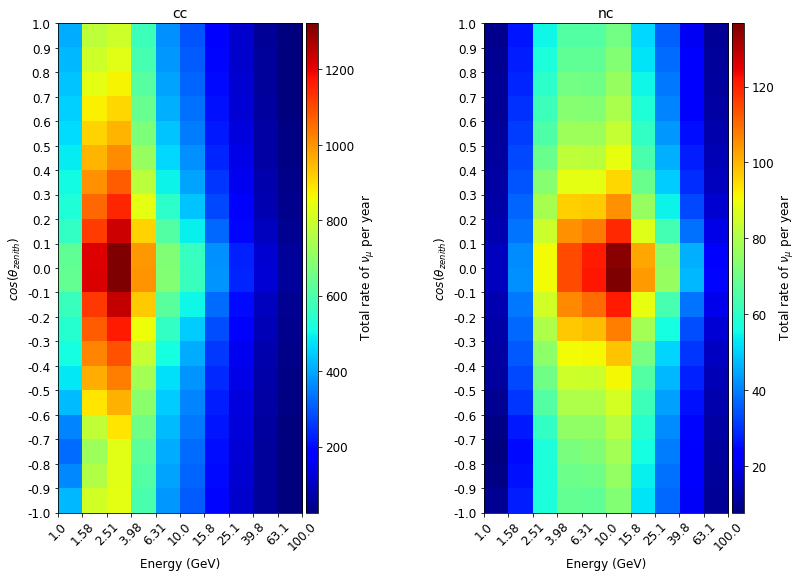

In [17]:
Honda_rate_cc, Honda_rate_nc = rate_plot(Honda_binned_cropped);

In [20]:
np.savetxt('Honda_total_rate_year_cc' , Honda_rate_cc, delimiter =',')
np.savetxt('Honda_total_rate_year_nc' , Honda_rate_nc, delimiter =',')

### Spline method

In [21]:
# for a fixed theta, interpolate the fluxes as a function of energy (with PCHIP-method)
from scipy import interpolate, integrate

x_interp = np.linspace(energy_min[0], energy_max[-1], 10000)
y_interp90 = interpolate.pchip_interpolate(energy_cropped, Honda_flux90, x_interp)

energy_bins_spline = np.digitize(x_interp, energy_min)
energy_bin_center = (energy_max + energy_min) / 2

In [22]:
# Integration (average)
avg = np.zeros(len(energy_min))

for i in range(1, len(energy_min)+1):
    x_integrate = x_interp[energy_bins_spline == i]
    y_integrate = y_interp90[energy_bins_spline == i]
    integral = np.trapz(y_integrate, x=x_integrate, dx=0.001, axis=- 1)
    avg[i-1] = integral / energy_binwidths[i-1]

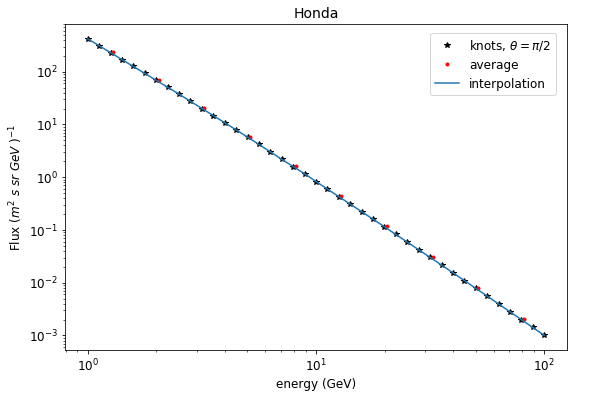

In [23]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_xlabel('energy (GeV)')
ax.set_ylabel(r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
ax.loglog(energy_cropped, Honda_flux90, 'k*', label = r'knots, $\theta=\pi/2$')
ax.loglog(energy_bin_center, avg, 'r.', label='average')
ax.loglog(x_interp, y_interp90, label = 'interpolation')
fig.legend(fontsize=12, loc=(0.73,0.76))
ax.set_title('Honda', fontsize=14);
#fig.savefig('Honda_spline90')

In [24]:
# Do it for all thetas and save the averages

Honda_binned_splines = np.zeros((20, 10))

for theta in range(20):
    y_interp = interpolate.pchip_interpolate(energy_cropped, Honda_unbinned_cropped[theta], x_interp)
    avg = np.zeros(len(energy_min))

    for i in range(1, len(energy_min)+1):
        x_integrate = x_interp[energy_bins_spline == i]
        y_integrate = y_interp[energy_bins_spline == i]
        integral = np.trapz(y_integrate, x=x_integrate, dx=0.001, axis=- 1)
        avg[i-1] = integral / energy_binwidths[i-1]
    
    Honda_binned_splines[theta] = avg


Text(0.5, 1.0, 'Honda')

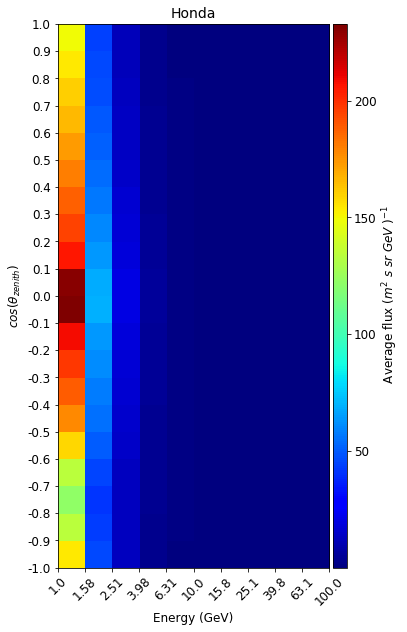

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(Honda_binned_splines, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
ax.set_title('Honda')
#fig.savefig('Honda_binned_flux_spline');

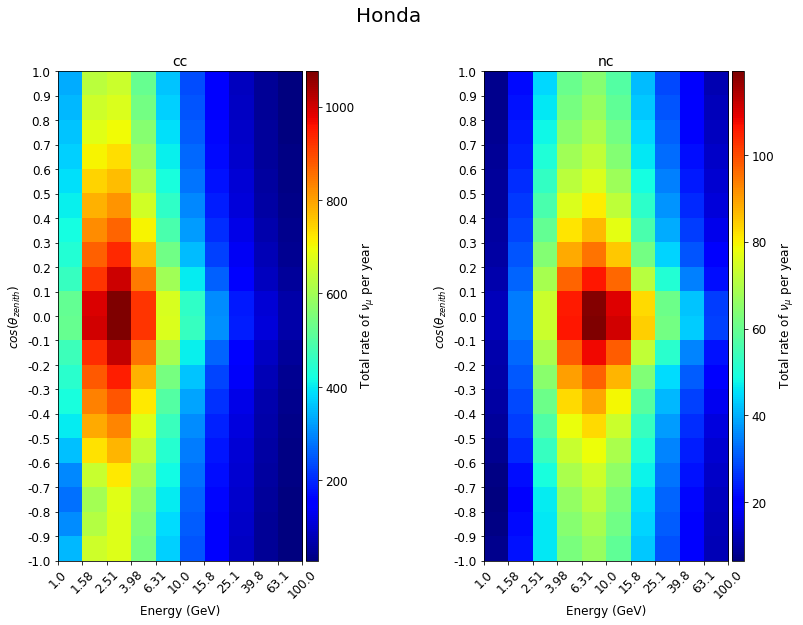

In [26]:
Honda_rate_spline_cc, Honda_rate_spline_nc = rate_plot(Honda_binned_splines, title='Honda') #, savefig='Honda_rates_spline');

In [27]:
np.savetxt('Honda_rate_spline_cc', Honda_rate_spline_cc, delimiter=',')
np.savetxt('Honda_rate_spline_nc', Honda_rate_spline_nc, delimiter=',')

### Comparison

In [30]:
MCEq_flux0 = np.genfromtxt('MCEq_flux0', delimiter=',')
MCEq_flux90 = np.genfromtxt('MCEq_flux90', delimiter=',')
MCEq_energy = np.genfromtxt('MCEq_energy', delimiter=',')
MCEq_flux = np.genfromtxt('MCEq_flux_binned', delimiter=',')

#### After splines

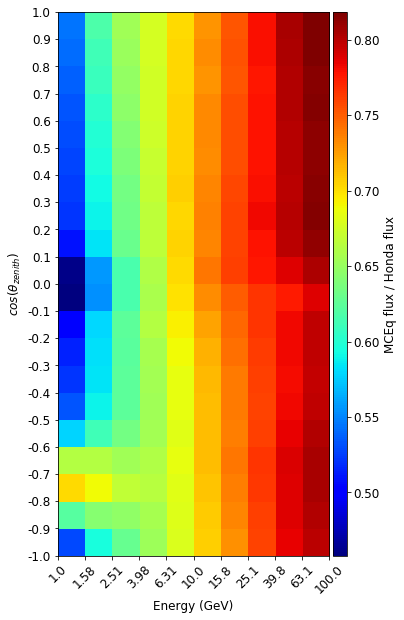

In [31]:
# Ratio

MCEq_binned_splines = np.genfromtxt('MCEq_binned_splines', delimiter=',')

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(MCEq_binned_splines/Honda_binned_splines, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label('MCEq flux / Honda flux', fontsize=12)
#fig.savefig('ratio_2d_totalnumu');

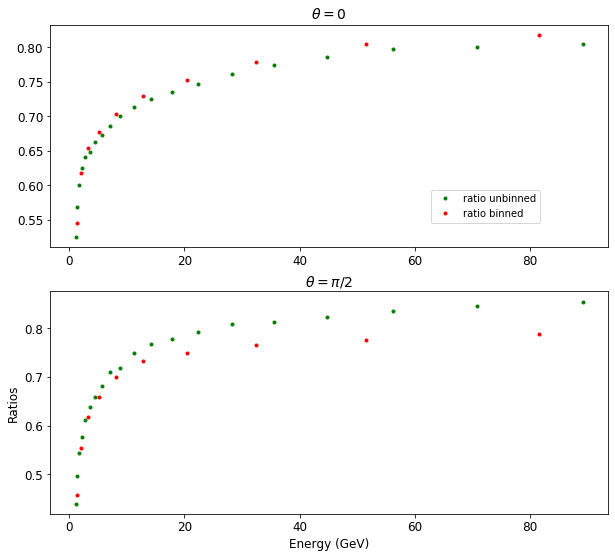

In [32]:
fig, ax = plt.subplots(2,1, figsize=(10,9))
ax.ravel()


ax[1].plot(MCEq_energy, MCEq_flux90/Honda_flux90[1::2], 'g.')
ax[1].plot(energy_bin_center, MCEq_binned_splines[10]/Honda_binned_splines[10], 'r.')
ax[1].set_title(r'$\theta = \pi/2$')

ax[0].plot(MCEq_energy, MCEq_flux0/Honda_flux0[1::2], 'g.', label='ratio unbinned')
ax[0].plot(energy_bin_center, MCEq_binned_splines[0]/Honda_binned_splines[0], 'r.', label='ratio binned')
ax[0].set_title(r'$\theta = 0$')

ax[1].set_xlabel('Energy (GeV)')
ax[1].set_ylabel('Ratios')
#ax.set_xlim(1, 100)
fig.legend(loc=(0.7,0.6))
#fig.savefig('Spline_ratios_1d');

#### Unbinned for higher energies

In [59]:
energy_sp.shape

(101,)

In [104]:
flux_MCEq_spline = np.genfromtxt('flux_MCEq_spline', delimiter=',')
MCEq_tot = np.concatenate((np.flip(flux_MCEq_spline, axis=0), flux_MCEq_spline))
MCEq_tot_energy = np.genfromtxt('MCEq_tot_energy', delimiter=',')
#total_numu.shape
MCEq_tot.shape

(20, 121)

In [96]:
print(MCEq_tot_energy[2], energy_sp[3]) # 3 og 2, 5 og 3, 7 og 4....  til -71 og -2

0.14125375446227548 0.14125


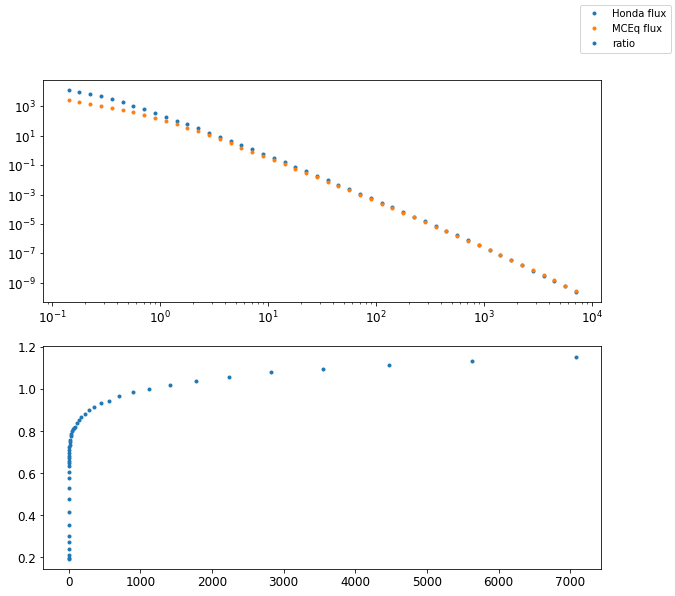

In [105]:
fig, ax = plt.subplots(2,1, figsize=(10,9))
ax.ravel()
ax[0].loglog(energy_sp[3:-2][::2], total_numu[0, 3:-2][::2], '.', label='Honda flux')
ax[0].loglog(MCEq_tot_energy[2:-71], MCEq_tot[0, 2:-71], '.', label='MCEq flux')
ax[1].plot(MCEq_tot_energy[2:-71],  MCEq_tot[0, 2:-71]/total_numu[0, 3:-2][::2], '.', label='ratio')
fig.legend();

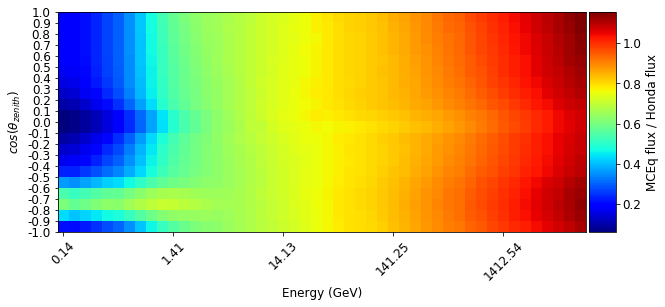

In [112]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(MCEq_tot[:, 2:-71]/total_numu[:,3:-2][:,::2], cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks([0,10,20,30,40])
ax.set_xticklabels(np.round( [MCEq_tot_energy[2:-71][i] for i in [0,10,20,30,40]] ,2), rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label('MCEq flux / Honda flux', fontsize=12)

#### Before splines

[0.43974936 0.49750069 0.54418839 0.57551177 0.61137033 0.63783676
 0.65801013 0.68186853 0.71043599 0.71860022 0.74950063 0.76629047
 0.77685613 0.79110506 0.80917138 0.81154284 0.82321621 0.8340541
 0.8448474  0.85436378]
[0.39114685 0.47124192 0.52239668 0.63098081 0.71663946 0.62011688
 0.63701911 0.65368652 0.7527375  0.95046607]


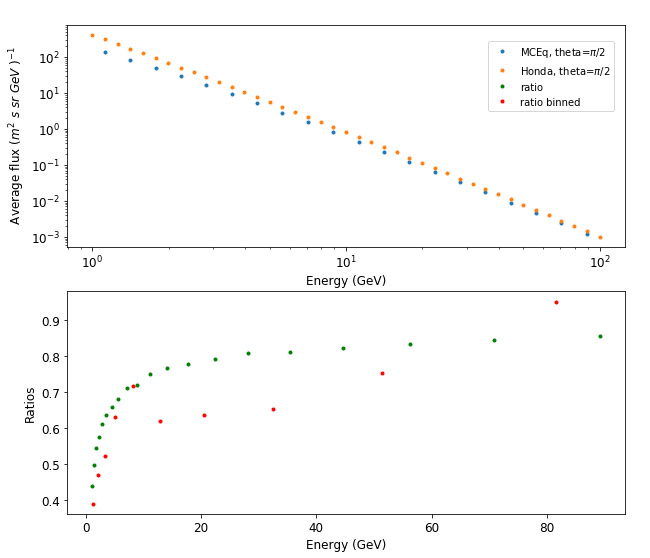

In [33]:
fig, ax = plt.subplots(2,1, figsize=(10,9))
ax.ravel()

ax[0].loglog(MCEq_energy, MCEq_flux90, '.', label=r'MCEq, theta=$\pi$/2')
ax[0].loglog(energy_cropped, Honda_flux90, '.', label=r'Honda, theta=$\pi$/2')
ax[1].plot(MCEq_energy, MCEq_flux90/Honda_flux90[1::2], 'g.', label='ratio')
ax[1].plot(energy_bin_center, MCEq_flux[10,:]/Honda_binned_cropped[10,:], 'r.', label='ratio binned')

ax[0].set_xlabel('Energy (GeV)', fontsize=12)
ax[0].set_ylabel(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)

ax[1].set_xlabel('Energy (GeV)')
ax[1].set_ylabel('Ratios')
#ax.set_xlim(1, 100)
fig.legend(loc=(0.75,0.8));
#fig.savefig('Fluxes90_compare_RegAvg')
print(MCEq_flux90/Honda_flux90[1::2])
print(MCEq_flux[10,:]/Honda_binned_cropped[10,:])

In [34]:
print(MCEq_energy)
energy_cropped

[ 1.12201845  1.41253754  1.77827941  2.23872114  2.81838293  3.54813389
  4.46683592  5.62341325  7.07945784  8.91250938 11.22018454 14.12537545
 17.7827941  22.38721139 28.18382931 35.48133892 44.66835922 56.23413252
 70.79457844 89.12509381]


array([  1.    ,   1.122 ,   1.2589,   1.4125,   1.5849,   1.7783,
         1.9953,   2.2387,   2.5119,   2.8184,   3.1623,   3.5481,
         3.9811,   4.4668,   5.0119,   5.6234,   6.3096,   7.0795,
         7.9433,   8.9125,  10.    ,  11.22  ,  12.589 ,  14.125 ,
        15.849 ,  17.783 ,  19.953 ,  22.387 ,  25.119 ,  28.184 ,
        31.623 ,  35.481 ,  39.811 ,  44.668 ,  50.119 ,  56.234 ,
        63.096 ,  70.795 ,  79.433 ,  89.125 , 100.    ])

[0.52539328 0.5681834  0.60048163 0.62493555 0.64147173 0.64861283
 0.66214134 0.67320524 0.68639032 0.70070485 0.71341725 0.72466734
 0.7356122  0.74636948 0.76152344 0.77376118 0.78594837 0.79699418
 0.79995362 0.80461625]
[0.4669766  0.52219065 0.54926528 0.64203765 0.71509682 0.60591171
 0.6244591  0.64431612 0.75844649 0.96313438]


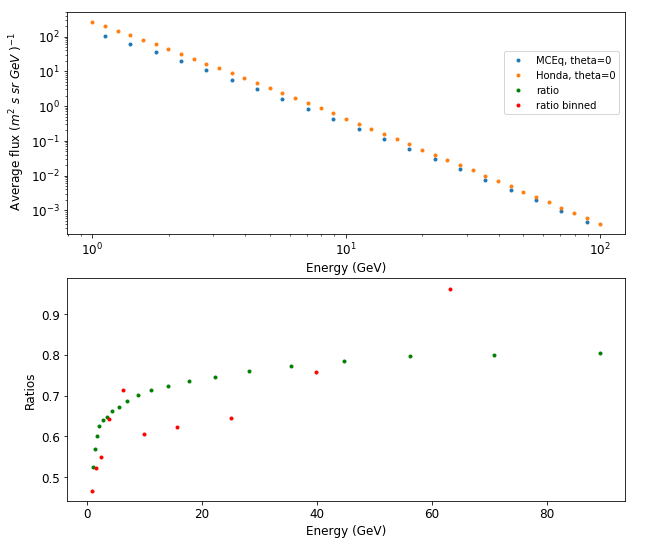

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10,9))
ax.ravel()

ax[0].loglog(MCEq_energy, MCEq_flux0, '.', label=r'MCEq, theta=0')
ax[0].loglog(energy_cropped, Honda_flux0, '.', label=r'Honda, theta=0')
ax[1].plot(MCEq_energy, MCEq_flux0/Honda_flux0[1::2], 'g.', label='ratio')
ax[1].plot(energy_min, MCEq_flux[0,:]/Honda_binned_cropped[0,:], 'r.', label='ratio binned')
#ax.loglog(energy_min[-1], np.mean(MCEq_flux0[-2:])/np.mean(Honda_flux0[-4:]), '.',label='last bin')

ax[0].set_xlabel('Energy (GeV)', fontsize=12)
ax[0].set_ylabel(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)

ax[1].set_xlabel('Energy (GeV)')
ax[1].set_ylabel('Ratios')
#ax.set_xlim(1, 100)
fig.legend(loc=(0.77,0.79));
#fig.savefig('Fluxes0_compare')
print(MCEq_flux0/Honda_flux0[1::2])
print(MCEq_flux[0,:]/Honda_binned_cropped[0,:])

In [36]:
MCEq_total_rate_year_cc = np.genfromtxt('MCEq_total_rate_year_cc', delimiter = ',')
MCEq_total_rate_year_nc = np.genfromtxt('MCEq_total_rate_year_nc', delimiter = ',')

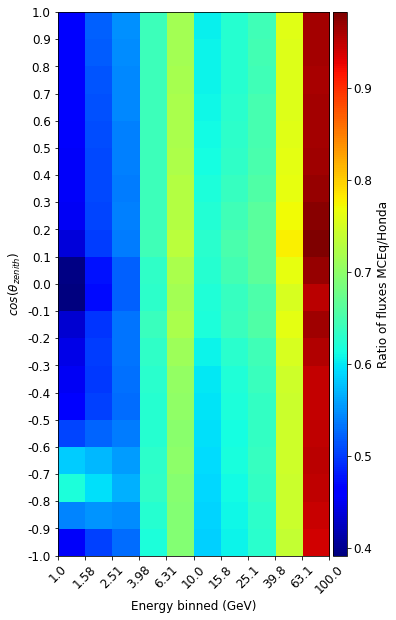

In [37]:
flux_plot(MCEq_flux/Honda_binned_cropped, cbar_label= 'Ratio of fluxes MCEq/Honda'); #, savefig = 'ratio_flux');

### Multiplying by oscillation probability

In [119]:
prob_numu_to_numu = np.genfromtxt('prob_numu_to_numu', delimiter = ',')

Text(0.5, 0.98, 'Honda')

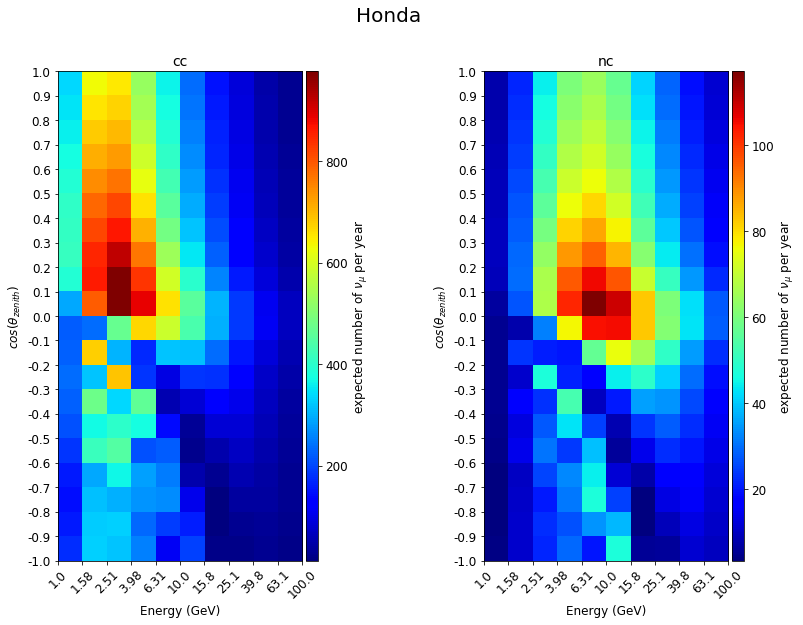

In [120]:
rate_cc_oscillated = prob_numu_to_numu * Honda_rate_spline_cc
rate_nc_oscillated = prob_numu_to_numu * Honda_rate_spline_nc

fig, ax = plt.subplots(1, 2, figsize=(14, 9))
ax.ravel()

im_0 = ax[0].imshow(rate_cc_oscillated, cmap='jet') 
im_1 = ax[1].imshow(rate_nc_oscillated, cmap='jet') 

for i in range(2):
    ax[i].set_xlabel('Energy (GeV)', fontsize = 12)
    ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(energy_strings, rotation = 45)
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(ylabels)

cbar_label = r'expected number of $\nu_{\mu}$ per year'
divider_0 = make_axes_locatable(ax[0])
divider_1 = make_axes_locatable(ax[1])
cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_0 = plt.colorbar(im_0, cax=cax_0)
cbar_1 = plt.colorbar(im_1, cax=cax_1)
cbar_0.set_label(cbar_label, fontsize = 12) 
cbar_1.set_label(cbar_label, fontsize = 12) 

ax[0].set_title('cc')
ax[1].set_title('nc')
plt.suptitle('Honda', fontsize=20)
#fig.savefig('Honda_rate_oscillated');

In [121]:
np.savetxt('Honda_rate_cc_oscillated', rate_cc_oscillated, delimiter=',')
np.savetxt('Honda_rate_nc_oscillated', rate_nc_oscillated, delimiter=',')

### $\chi^2$ between oscillated and unoscillated numu events

In [122]:
# rate_cc_oscillated
# rate_year_cc
    
chi2_cc = np.sum(((Honda_rate_cc - rate_cc_oscillated)**2 / (Honda_rate_cc + rate_cc_oscillated)))
chi2_nc = np.sum(((Honda_rate_nc - rate_nc_oscillated)**2 / (Honda_rate_cc + rate_nc_oscillated)))
print(chi2_cc, chi2_nc)

# reduced chi-square = chi squared / # degrees of freedom
Ndof = 200
chi2_cc_reduced = chi2_cc / Ndof
chi2_nc_reduced = chi2_nc / Ndof
print(chi2_cc_reduced, chi2_nc_reduced)

13363.738300940997 333.7801100669
66.81869150470499 1.6689005503345


In [140]:
# Applying statistical fluctuations to the oscillated rate (pseudo-trials)
# # events +/- sqrt(# events)
r = np.random

rate_fluctuation_cc = rate_cc_oscillated.copy()
rate_fluctuation_nc = rate_nc_oscillated.copy()

rate_fluctuation_cc += r.poisson(np.sqrt(rate_fluctuation_cc))*(2*r.randint(0,2, size=(20,10))-1)
rate_fluctuation_nc += r.poisson(np.sqrt(rate_fluctuation_nc)) *(2*r.randint(0,2, size=(20,10))-1)

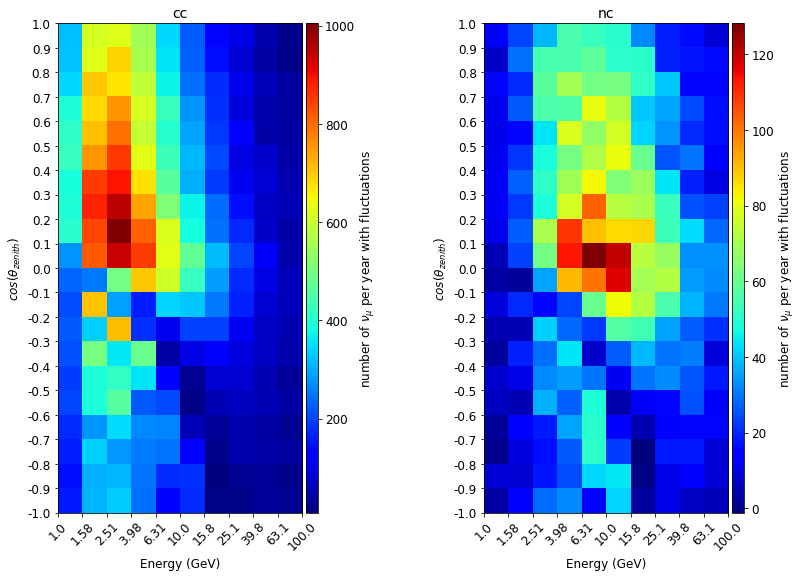

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(14, 9))
ax.ravel()

im_0 = ax[0].imshow(rate_fluctuation_cc, cmap='jet') 
im_1 = ax[1].imshow(rate_fluctuation_nc, cmap='jet') 

for i in range(2):
    ax[i].set_xlabel('Energy (GeV)', fontsize = 12)
    ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(energy_strings, rotation = 45)
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(ylabels)

cbar_label = r'number of $\nu_{\mu}$ per year with fluctuations'
divider_0 = make_axes_locatable(ax[0])
divider_1 = make_axes_locatable(ax[1])
cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_0 = plt.colorbar(im_0, cax=cax_0)
cbar_1 = plt.colorbar(im_1, cax=cax_1)
cbar_0.set_label(cbar_label, fontsize = 12) 
cbar_1.set_label(cbar_label, fontsize = 12) 

ax[0].set_title('cc')
ax[1].set_title('nc');
#fig.savefig('numu_oscillated_fluctuations');

In [134]:
chi2_cc_fluctuation = np.sum(((Honda_rate_cc - rate_fluctuation_cc)**2 /  rate_fluctuation_cc))
chi2_nc_fluctuation = np.sum(((Honda_rate_nc - rate_fluctuation_nc)**2 /  rate_fluctuation_nc))
chi2_cc_fluct_red = chi2_cc_fluctuation / Ndof
chi2_nc_fluct_red = chi2_nc_fluctuation / Ndof
print(chi2_cc_fluctuation, chi2_nc_fluctuation)

28206.187295011772 4823.281073633116


In [142]:
# doing this 100 times
N_runs = 1000
chi2_red_cc_array_fluct = np.zeros(N_runs)
chi2_red_nc_array_fluct = np.zeros(N_runs)

for n in range(N_runs):
    rate_fluctuation_cc = rate_cc_oscillated.copy()
    rate_fluctuation_nc = rate_nc_oscillated.copy()

    rate_fluctuation_cc += r.poisson(np.sqrt(rate_fluctuation_cc))
    rate_fluctuation_nc += r.poisson(np.sqrt(rate_fluctuation_nc))
    
    chi2_red_cc_fluctuation = np.sum(((Honda_rate_cc - rate_fluctuation_cc)**2 / rate_fluctuation_cc)) / Ndof
    chi2_red_nc_fluctuation = np.sum(((Honda_rate_nc - rate_fluctuation_nc)**2 /  rate_fluctuation_nc)) / Ndof
    chi2_red_cc_array_fluct[n] = chi2_red_cc_fluctuation
    chi2_red_nc_array_fluct[n] = chi2_red_nc_fluctuation

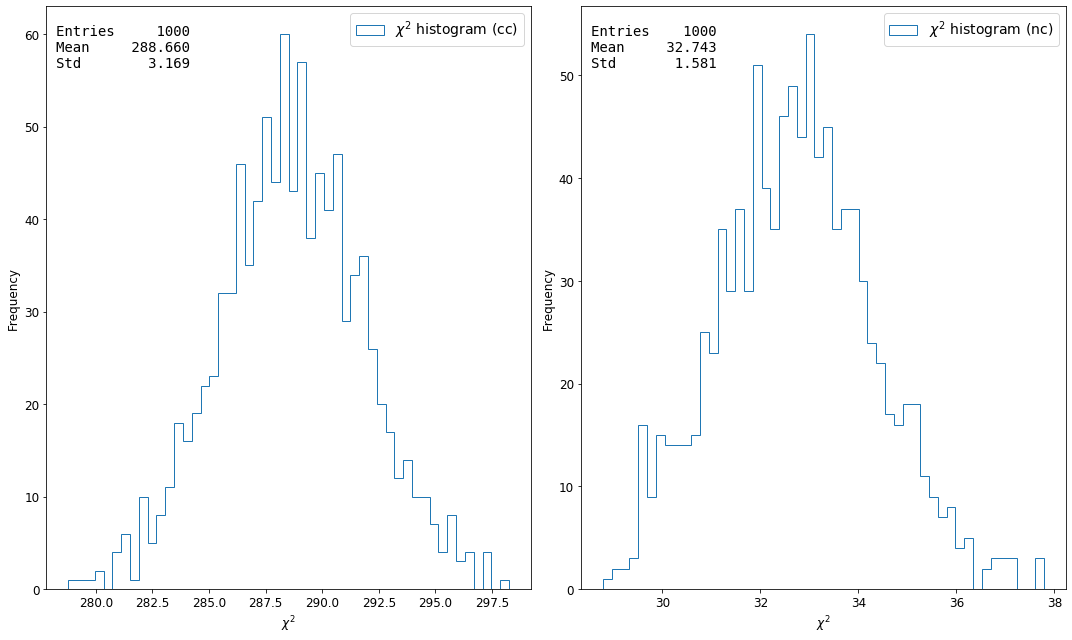

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(15, 9))
ax.ravel()
ax[0].hist(chi2_red_cc_array_fluct, bins = 50, histtype = 'step', label = r'$\chi^2$ histogram (cc)')
ax[1].hist(chi2_red_nc_array_fluct, bins = 50, histtype = 'step', label = r'$\chi^2$ histogram (nc)')
ax[0].set(xlabel=r"$\chi^2$", ylabel="Frequency")
ax[1].set(xlabel=r"$\chi^2$", ylabel="Frequency")
# Define the figure text
d0 = {'Entries': N_runs,
      'Mean': chi2_red_cc_array_fluct.mean(),
      'Std': chi2_red_cc_array_fluct.std(),
    }
d1 = {'Entries': N_runs,
      'Mean': chi2_red_nc_array_fluct.mean(),
      'Std': chi2_red_nc_array_fluct.std(),
    }

# Add figure text
text0 = ef.nice_string_output(d0, extra_spacing=2, decimals=3)
text1 = ef.nice_string_output(d1, extra_spacing=2, decimals=3)
ef.add_text_to_ax(0.02, 0.97, text0, ax[0], fontsize=14)
ef.add_text_to_ax(0.02, 0.97, text1, ax[1], fontsize=14)

# Add legend
ax[0].legend(loc='best', fontsize=14)
ax[1].legend(loc='best', fontsize=14)
fig.tight_layout()
#fig.savefig('Honda_chi_squared_rate_to_oscfluc')